## Milestone 2 - Data Exploration & Initial Preprocessing

#### Dependencies to install

In [62]:
!pip install ucimlrepo -q

#### Imports

In [63]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#### Fetching data

In [64]:
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

####Check for missing values and duplicate entries and drop


In [65]:
#Check if there are any missing values or duplicate entries in the data set

dataset = pd.concat([X, y], axis=1)
print(dataset.isnull().sum(),'\n')
print('Number of duplicates:', dataset.duplicated().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64 

Number of duplicates: 24206


In [66]:
dataset = dataset.drop_duplicates()

X = dataset[X.columns]
y = dataset[y.columns]

#### Total observations in dataset

In [67]:
print('Number of rows in features dataset:', len(X))
print('Number of rows in target dataset:', len(y))

Number of rows in features dataset: 229474
Number of rows in target dataset: 229474


#### Description of target column

**Diabetes_binary**  
    Description: Diabetes diagnosis status  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No diabetes, 1 = Prediabetes/diabetes

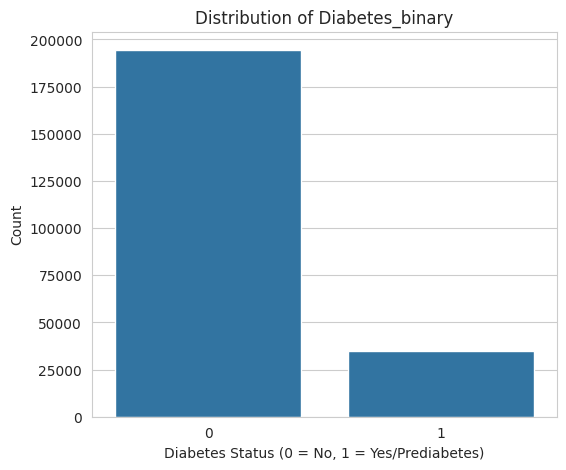

In [68]:
plt.figure(figsize=(6, 5))
sns.countplot(x=y.iloc[:, 0])  # .iloc[:, 0] selects the first (and only) column as a Series
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes/Prediabetes)')
plt.ylabel('Count')
plt.show()

Because the target set is very scewed we will have to synthetically balance later on in our training data

#### Features Analysis

**ID**  
    Description: Unique patient identifier  
    Continuous or Categorical: Continuous (Integer)  
    Possible values: Whole **numbers**

**HighBP**  
    Description: High blood pressure diagnosed  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

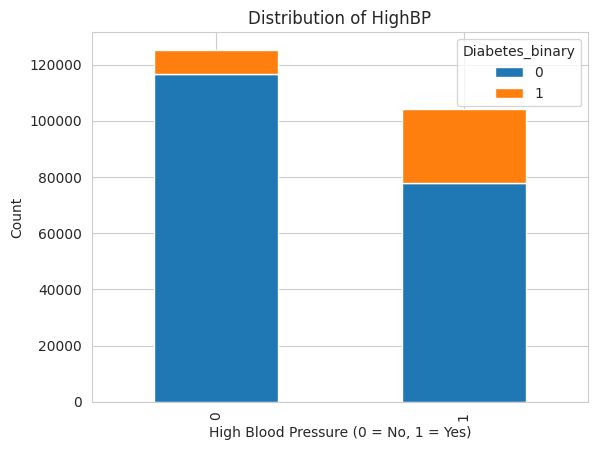

In [69]:
data = pd.concat([X['HighBP'], y], axis=1)
data = data.groupby(['HighBP', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of HighBP')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**HighChol**  
    Description: High cholesterol diagnosed  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

Text(0, 0.5, 'Count')

<Figure size 700x500 with 0 Axes>

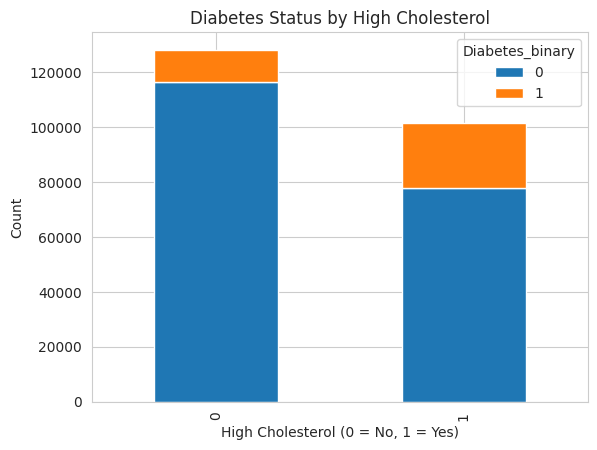

In [70]:
data = pd.concat([X['HighChol'], y], axis=1)
data = data.groupby(['HighChol', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Diabetes Status by High Cholesterol')
plt.xlabel('High Cholesterol (0 = No, 1 = Yes)')
plt.ylabel('Count')

**CholCheck**  
    Description: Cholesterol check in last 5 years  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

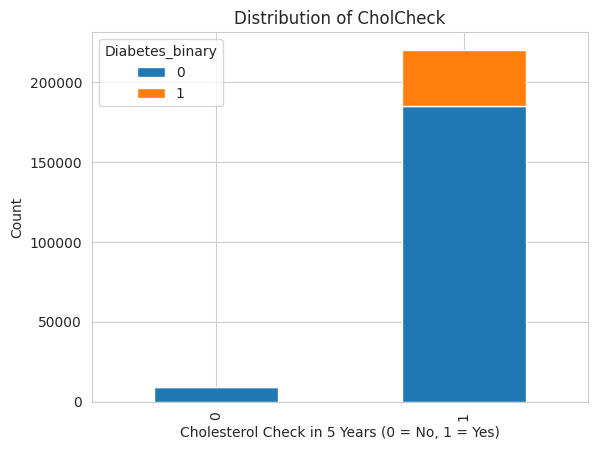

In [71]:
data = pd.concat([X['CholCheck'], y], axis=1)
data = data.groupby(['CholCheck', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of CholCheck')
plt.xlabel('Cholesterol Check in 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**BMI**  
    Description: Body Mass Index  
    Continuous or Categorical: Continuous (Integer)  
    Possible values: Whole number BMI score

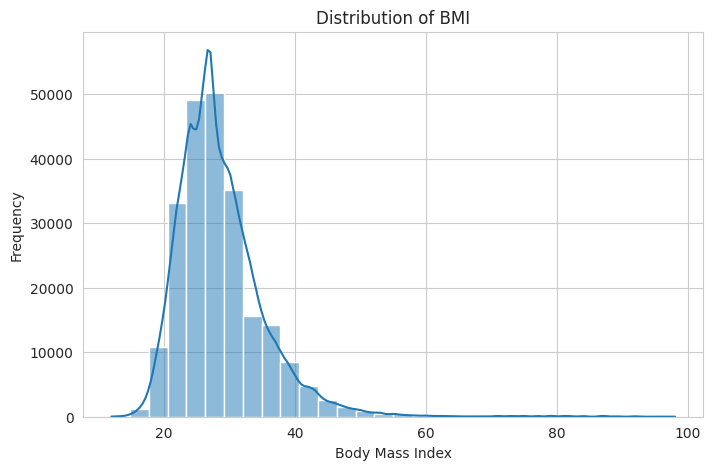

In [72]:
plt.figure(figsize=(8, 5))
sns.histplot(X['BMI'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()

**Smoker**  
    Description: Smoked ≥100 cigarettes in lifetime  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

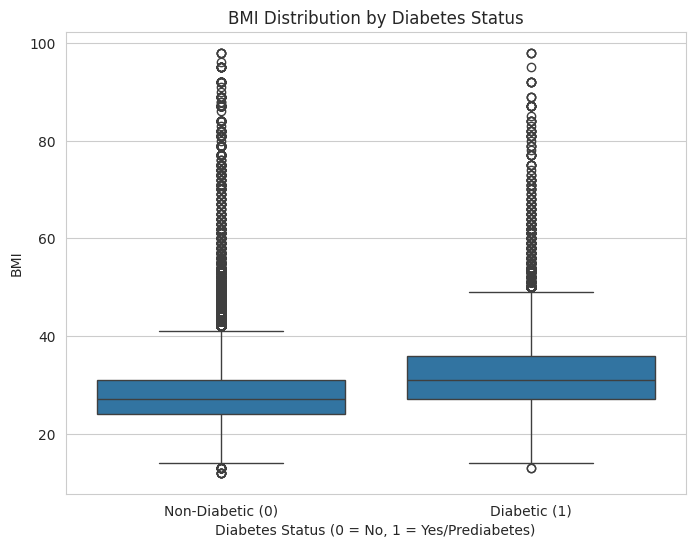

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y.iloc[:, 0], y=X['BMI'])
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes/Prediabetes)')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'])
plt.show()

<Figure size 700x500 with 0 Axes>

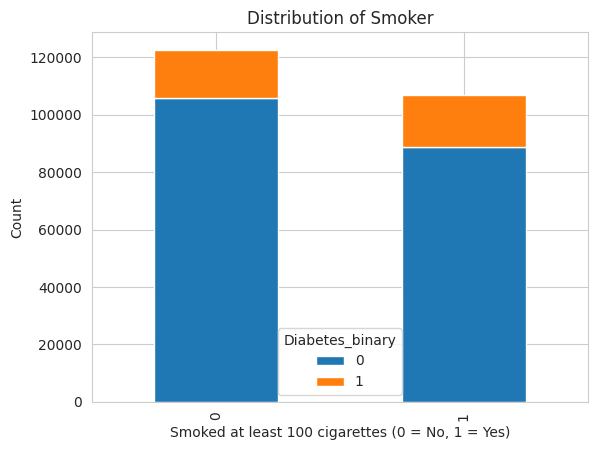

In [74]:
data = pd.concat([X['Smoker'], y], axis=1)
data = data.groupby(['Smoker', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Smoker')
plt.xlabel('Smoked at least 100 cigarettes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Stroke**  
    Description: Ever told you had a stroke  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

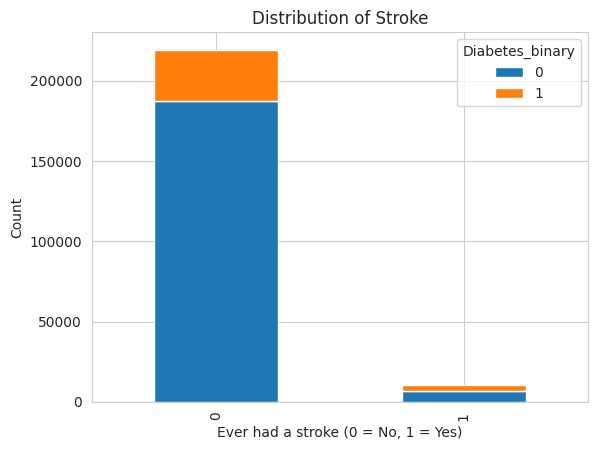

In [75]:
data = pd.concat([X['Stroke'], y], axis=1)
data = data.groupby(['Stroke', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Stroke')
plt.xlabel('Ever had a stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**HeartDiseaseorAttack**  
    Description: CHD or heart attack history  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

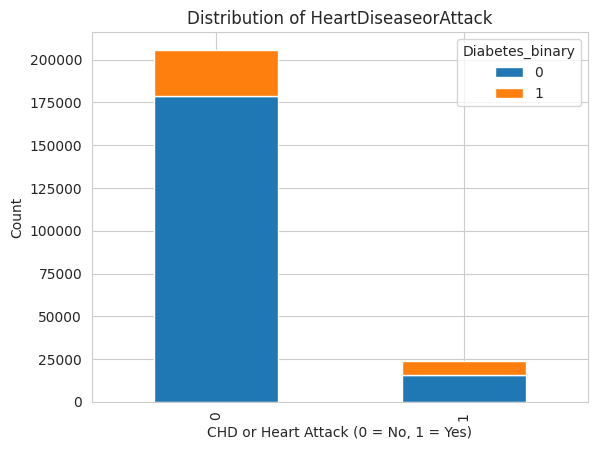

In [76]:
data = pd.concat([X['HeartDiseaseorAttack'], y], axis=1)
data = data.groupby(['HeartDiseaseorAttack', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of HeartDiseaseorAttack')
plt.xlabel('CHD or Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**PhysActivity**  
    Description: Physical activity in past 30 days (not job-related)  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

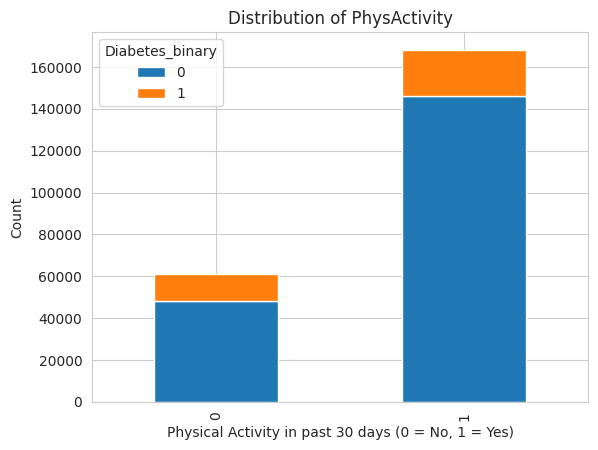

In [77]:
data = pd.concat([X['PhysActivity'], y], axis=1)
data = data.groupby(['PhysActivity', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of PhysActivity')
plt.xlabel('Physical Activity in past 30 days (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Fruits**  
    Description: Fruit consumption ≥1 time per day  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

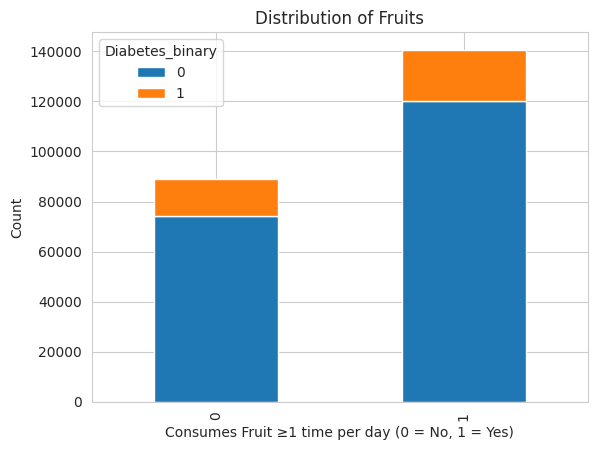

In [78]:
data = pd.concat([X['Fruits'], y], axis=1)
data = data.groupby(['Fruits', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Fruits')
plt.xlabel('Consumes Fruit ≥1 time per day (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Veggies**  
    Description: Vegetable consumption ≥1 time per day  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

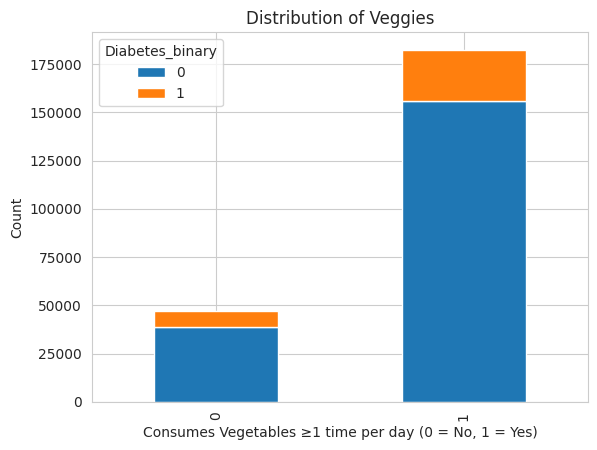

In [79]:
data = pd.concat([X['Veggies'], y], axis=1)
data = data.groupby(['Veggies', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Veggies')
plt.xlabel('Consumes Vegetables ≥1 time per day (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**HvyAlcoholConsump**  
    Description: Heavy alcohol consumption  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

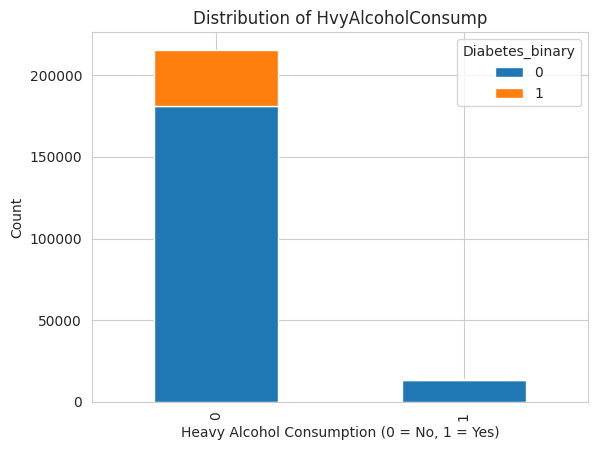

In [80]:
data = pd.concat([X['HvyAlcoholConsump'], y], axis=1)
data = data.groupby(['HvyAlcoholConsump', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of HvyAlcoholConsump')
plt.xlabel('Heavy Alcohol Consumption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**AnyHealthcare**  
    Description: Access to any healthcare coverage  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

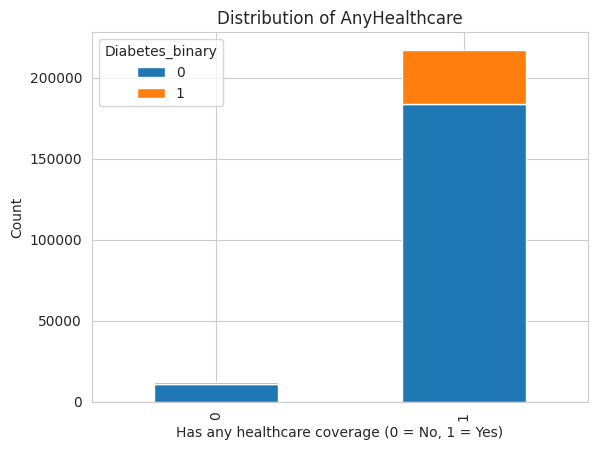

In [81]:
data = pd.concat([X['AnyHealthcare'], y], axis=1)
data = data.groupby(['AnyHealthcare', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of AnyHealthcare')
plt.xlabel('Has any healthcare coverage (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**NoDocbcCost**  
    Description: Could not see doctor due to cost  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

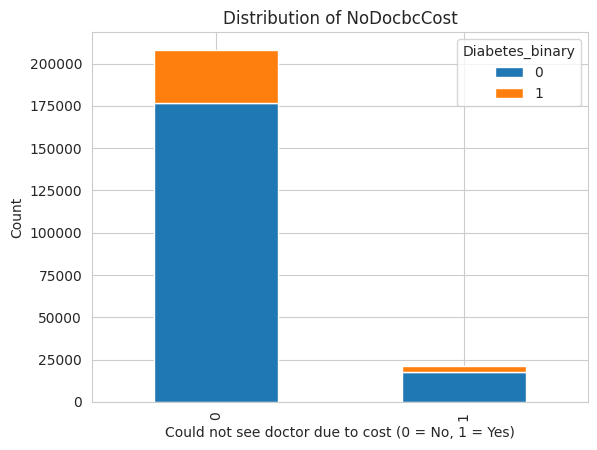

In [82]:
data = pd.concat([X['NoDocbcCost'], y], axis=1)
data = data.groupby(['NoDocbcCost', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of NoDocbcCost')
plt.xlabel('Could not see doctor due to cost (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**GenHlth**  
    Description: Self-rated overall health  
    Continuous or Categorical: Categorical (Ordinal)  
    Possible values:  
    1 = Excellent  
    2 = Very good  
    3 = Good  
    4 = Fair  
    5 = Poor

<Figure size 800x500 with 0 Axes>

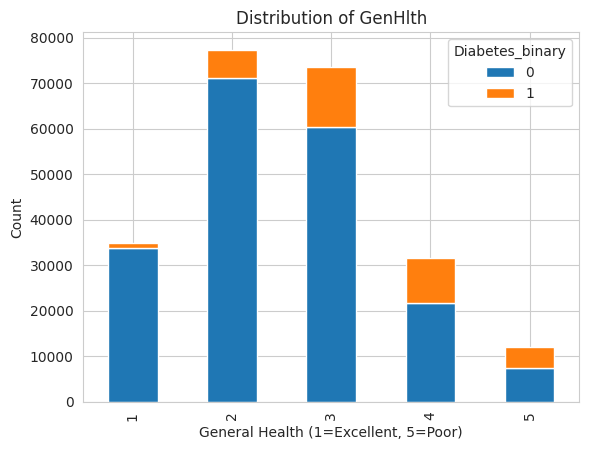

In [83]:
data = pd.concat([X['GenHlth'], y], axis=1)
data = data.groupby(['GenHlth', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(8, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of GenHlth')
plt.xlabel('General Health (1=Excellent, 5=Poor)')
plt.ylabel('Count')
plt.show()

**MentHlth**  
    Description: Days mental health not good  
    Continuous or Categorical: Continuous (Integer)  
    Possible values: 0–30

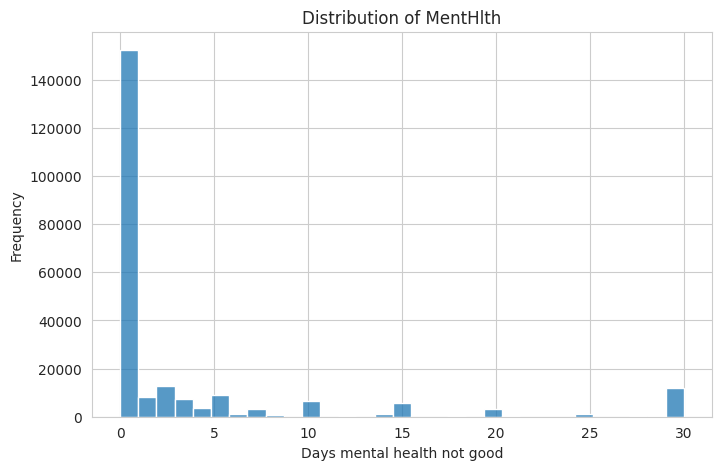

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(X['MentHlth'], kde=False, bins=31) # bins=31 to show each day
plt.title('Distribution of MentHlth')
plt.xlabel('Days mental health not good')
plt.ylabel('Frequency')
plt.show()

**PhysHlth**  
    Description: Days physical health not good  
    Continuous or Categorical: Continuous (Integer)  
    Possible values: 0–30

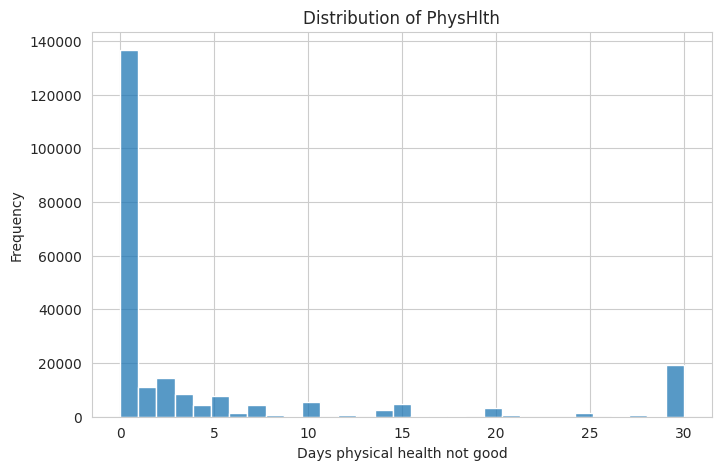

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(X['PhysHlth'], kde=False, bins=31) # bins=31 to show each day
plt.title('Distribution of PhysHlth')
plt.xlabel('Days physical health not good')
plt.ylabel('Frequency')
plt.show()

**DiffWalk**  
    Description: Difficulty walking/climbing stairs  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = No, 1 = Yes

<Figure size 700x500 with 0 Axes>

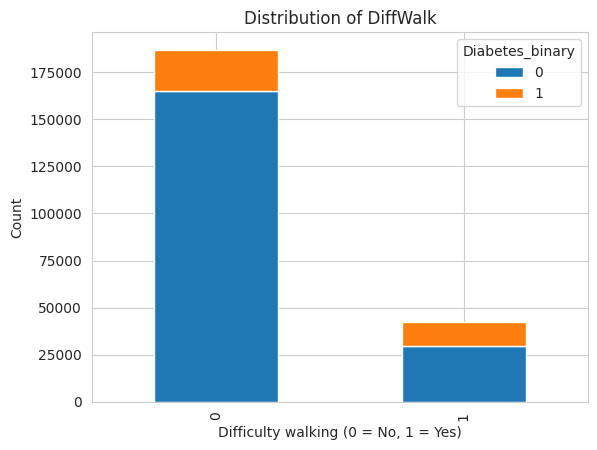

In [86]:
data = pd.concat([X['DiffWalk'], y], axis=1)
data = data.groupby(['DiffWalk', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of DiffWalk')
plt.xlabel('Difficulty walking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

**Sex**  
    Description: Biological sex  
    Continuous or Categorical: Categorical (Binary)  
    Possible values: 0 = Female, 1 = Male

<Figure size 700x500 with 0 Axes>

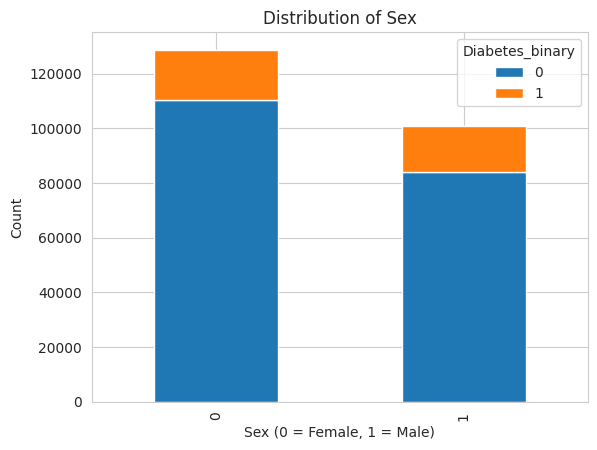

In [87]:
data = pd.concat([X['Sex'], y], axis=1)
data = data.groupby(['Sex', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(7, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

**Age**  
    Description: Age category (5-year groups)  
    Continuous or Categorical: Categorical (Ordinal)  
    Possible values:  
    1 = 18–24  
    2 = 25–29  
    3 = 30–34  
    4 = 35–39  
    5 = 40–44  
    6 = 45–49  
    7 = 50–54  
    8 = 55–59  
    9 = 60–64  
    10 = 65–69  
    11 = 70–74  
    12 = 75–79  
    13 = 80+

<Figure size 1000x600 with 0 Axes>

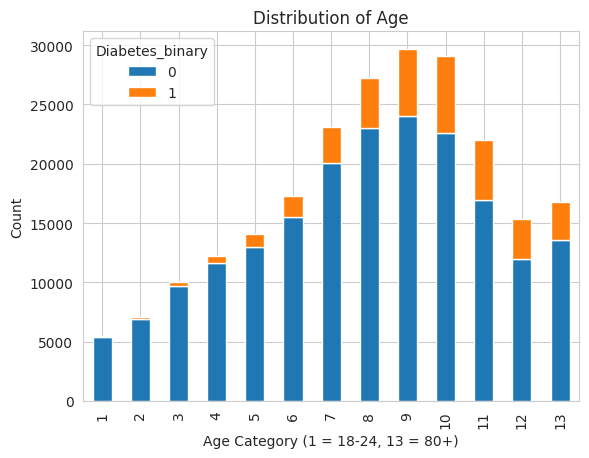

In [88]:
data = pd.concat([X['Age'], y], axis=1)
data = data.groupby(['Age', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Age')
plt.xlabel('Age Category (1 = 18-24, 13 = 80+)')
plt.ylabel('Count')
plt.show()

**Education**  
    Description: Highest education level  
    Continuous or Categorical: Categorical (Ordinal)  
    Possible values:  
    1 = No school / Kindergarten only  
    2 = Grades 1–8  
    3 = Grades 9–11  
    4 = High school graduate / GED  
    5 = Some college / Tech school  
    6 = College graduate (4+ years)


<Figure size 800x500 with 0 Axes>

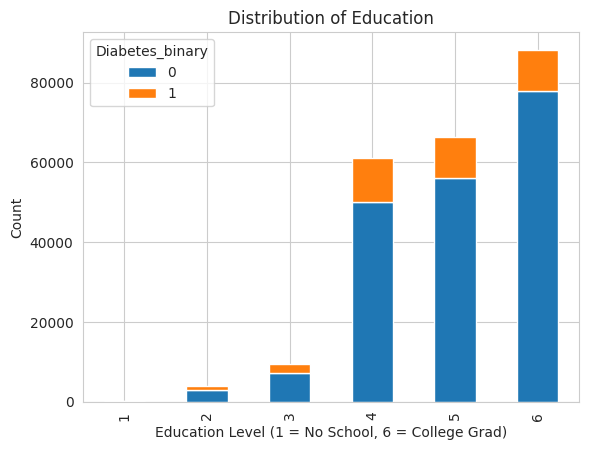

In [89]:
data = pd.concat([X['Education'], y], axis=1)
data = data.groupby(['Education', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(8, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Education')
plt.xlabel('Education Level (1 = No School, 6 = College Grad)')
plt.ylabel('Count')
plt.show()

**Income**  
    Description: Annual household income level  
    Continuous or Categorical: Categorical (Ordinal)  
    Possible values:  
    1 = < $10,000  
    2 = $10,000–$15,000  
    3 = $15,000–$20,000  
    4 = $20,000–$25,000  
    5 = $25,000–$35,000  
    6 = $35,000–$50,000  
    7 = $50,000–$75,000  
    8 = ≥ $75,000

<Figure size 900x500 with 0 Axes>

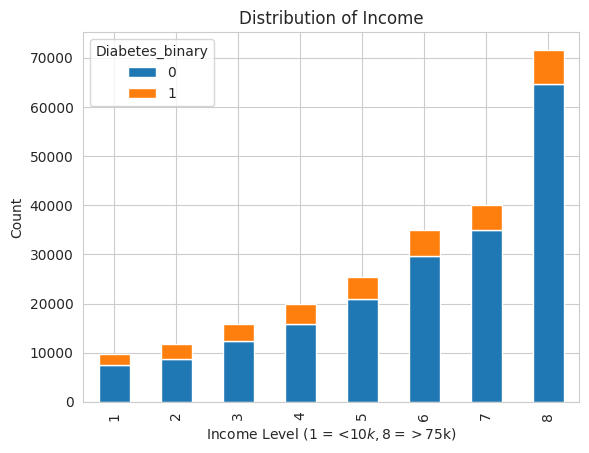

In [90]:
data = pd.concat([X['Income'], y], axis=1)
data = data.groupby(['Income', 'Diabetes_binary']).size().unstack()

plt.figure(figsize=(9, 5))
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Income')
plt.xlabel('Income Level (1 = <$10k, 8 = >$75k)')
plt.ylabel('Count')
plt.show()

**Corelation Matrix**



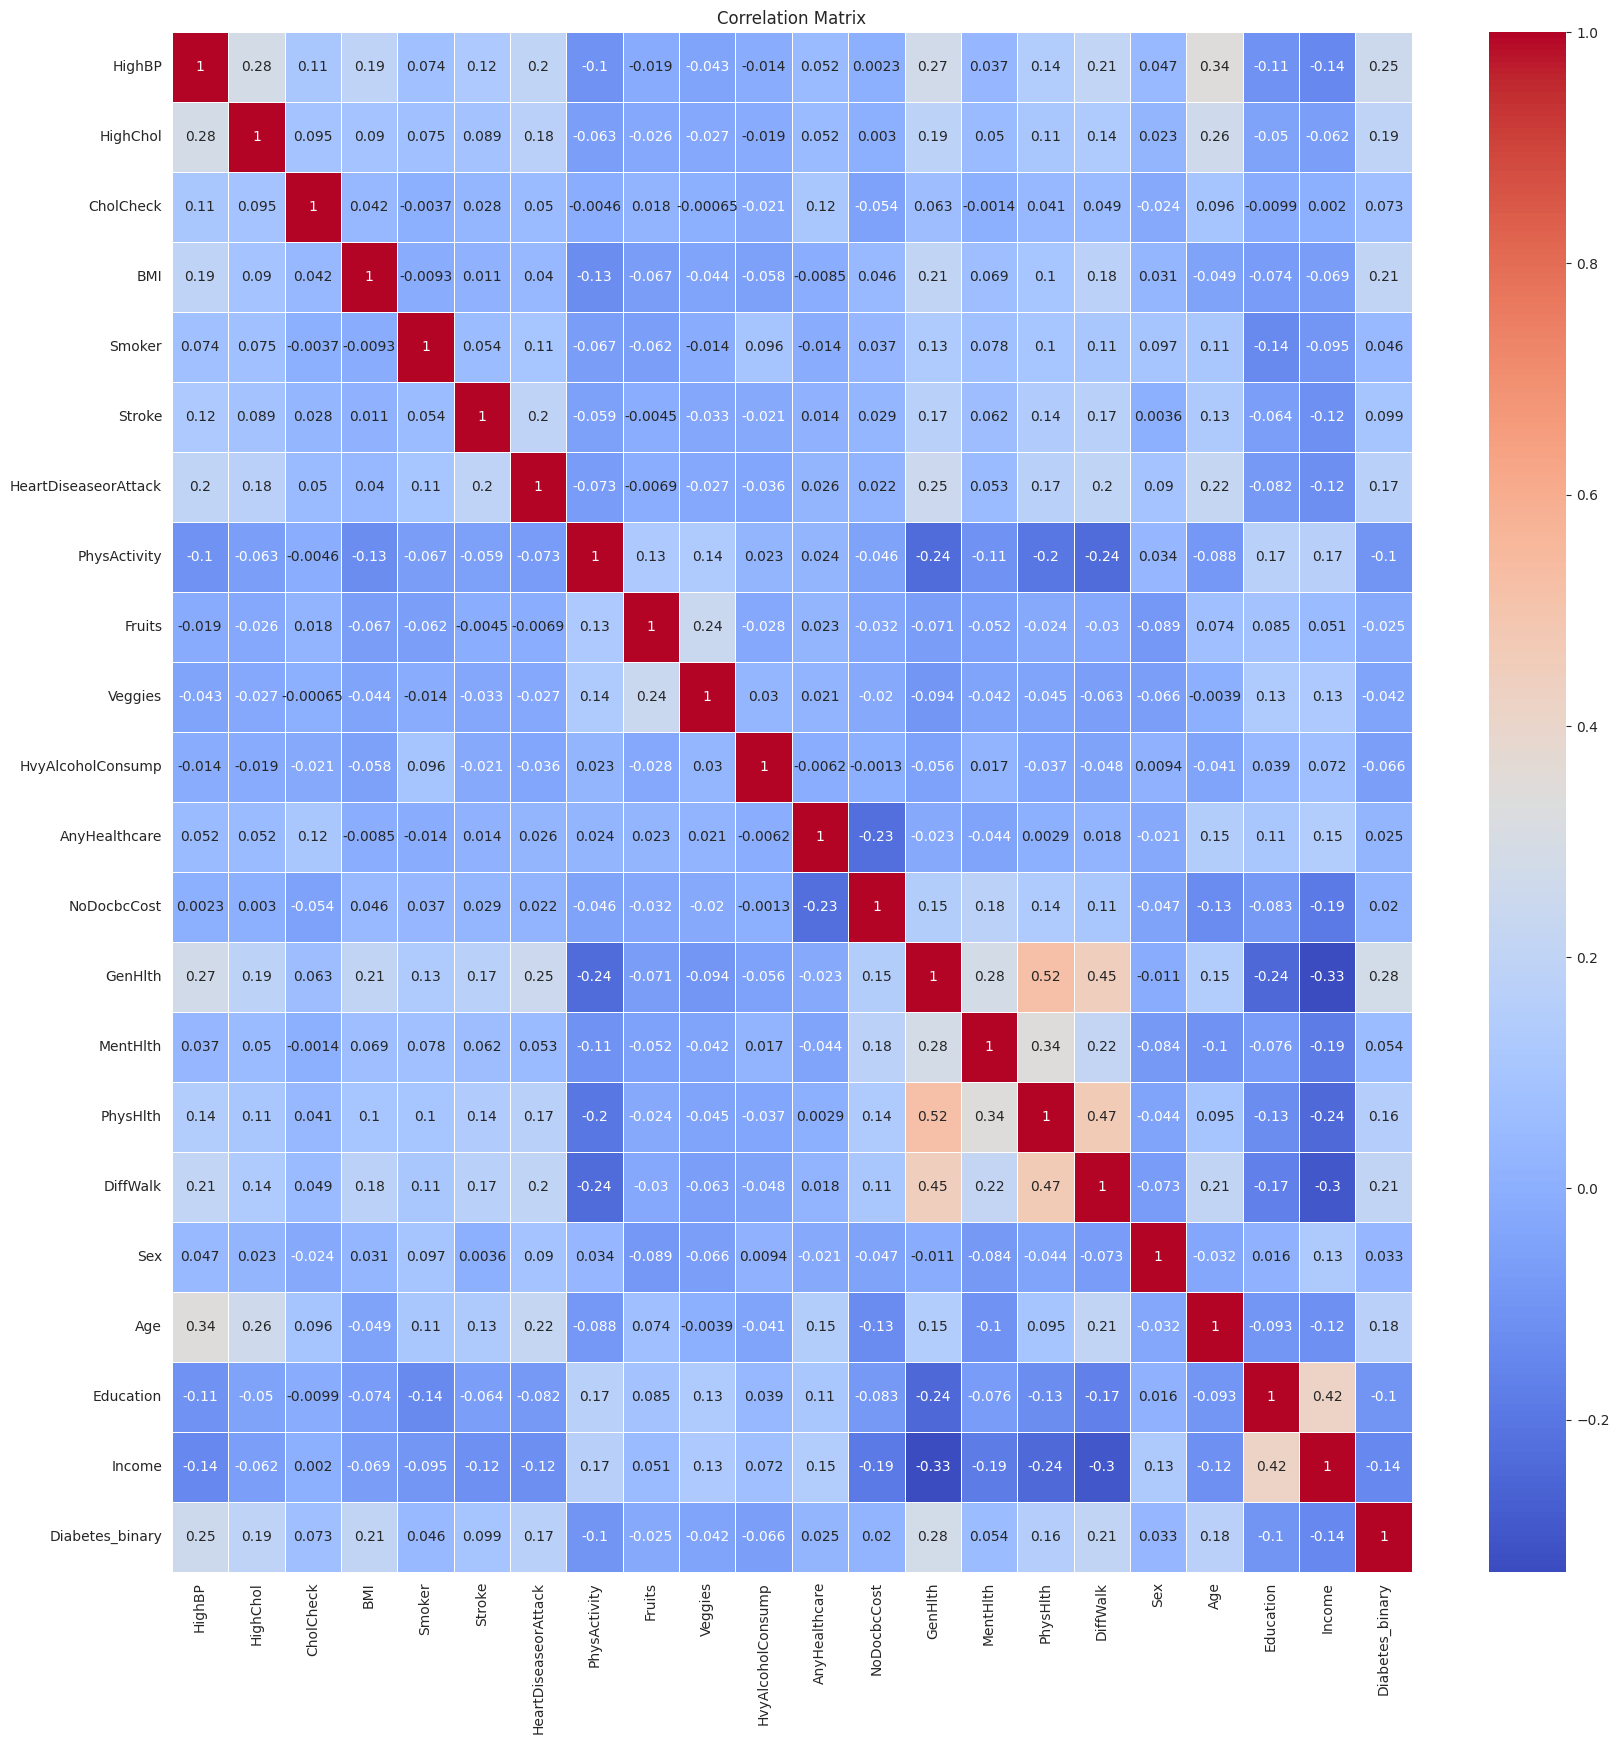

In [91]:
cor_matrix = pd.concat([X, y], axis=1).corr()

#cor_matrix = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [92]:
#Rank features by magnitude of correlation to the target set
cor_matrix_target = cor_matrix['Diabetes_binary'].abs().sort_values(ascending=False)
cor_matrix_target


,Diabetes_binary
Diabetes_binary,1.000000
GenHlth,0.276940
HighBP,0.254318
DiffWalk,0.205302
BMI,0.205086
HighChol,0.194944
Age,0.177263
HeartDiseaseorAttack,0.168213
PhysHlth,0.156211
Income,0.140659


In [93]:
initial_target_feat = list(cor_matrix_target.index[1:13]) #pick top 12
initial_target_feat

['GenHlth',
 'HighBP',
 'DiffWalk',
 'BMI',
 'HighChol',
 'Age',
 'HeartDiseaseorAttack',
 'PhysHlth',
 'Income',
 'Education',
 'PhysActivity',
 'Stroke']

In [94]:
#Check if there are any missing values or duplicate entries in the data set

dataset = pd.concat([X, y], axis=1)
print(dataset.isnull().sum())
print(dataset.duplicated().sum())

duplicates = dataset[dataset.duplicated()]
print(duplicates)

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64
0
Empty DataFrame
Columns: [HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income, Diabetes_binary]
Index: []

[0 rows x 22 columns]
